In [1]:
#Load the dependencies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import style



In [2]:
plt.style.use('bmh')

In [3]:
style.use('ggplot')

In [5]:
#Load the data and Store the data into a data frame
df=pd.read_csv('TSLA.csv')

In [6]:
print (df.head(25))

         Open       High        Low      Close  Adj Close    Volume
0   19.000000  25.000000  17.540001  23.889999  23.889999  18766300
1   25.790001  30.420000  23.299999  23.830000  23.830000  17187100
2   25.000000  25.920000  20.270000  21.959999  21.959999   8218800
3   23.000000  23.100000  18.709999  19.200001  19.200001   5139800
4   20.000000  20.000000  15.830000  16.110001  16.110001   6866900
5   16.400000  16.629999  14.980000  15.800000  15.800000   6921700
6   16.139999  17.520000  15.570000  17.459999  17.459999   7711400
7   17.580000  17.900000  16.549999  17.400000  17.400000   4050600
8   17.950001  18.070000  17.000000  17.049999  17.049999   2202500
9   17.389999  18.639999  16.900000  18.139999  18.139999   2680100
10  17.940001  20.150000  17.760000  19.840000  19.840000   4195200
11  19.940001  21.500000  19.000000  19.889999  19.889999   3739800
12  20.700001  21.299999  20.049999  20.639999  20.639999   2621300
13  21.370001  22.250000  20.920000  21.910000  

In [7]:

x=df[['High','Open', 'Low', 'Volume']].values
y=df['Close'].values



In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [9]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
y_pred = regressor.predict(x_test)
result = pd.DataFrame({"Actual" :y_test. flatten(), "Predicted":y_pred.flatten()})
result.head (25)

,Actual,Predicted
0,207.729996,211.933274
1,28.280001,28.343446
2,24.010000,23.967470
3,315.230011,326.638890
4,200.240005,197.999511
5,210.240005,209.841431
6,26.440001,26.570540
7,22.790001,24.115965
8,224.839996,218.550465
9,353.179993,350.599448


In [11]:

import math

In [12]:

graph = result.head(20)

<AxesSubplot:>

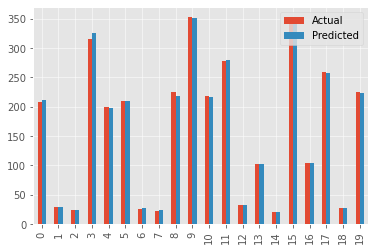

In [13]:
graph.plot(kind='bar')

In [14]:
#Get the number of trading days
df.shape

(2416, 6)

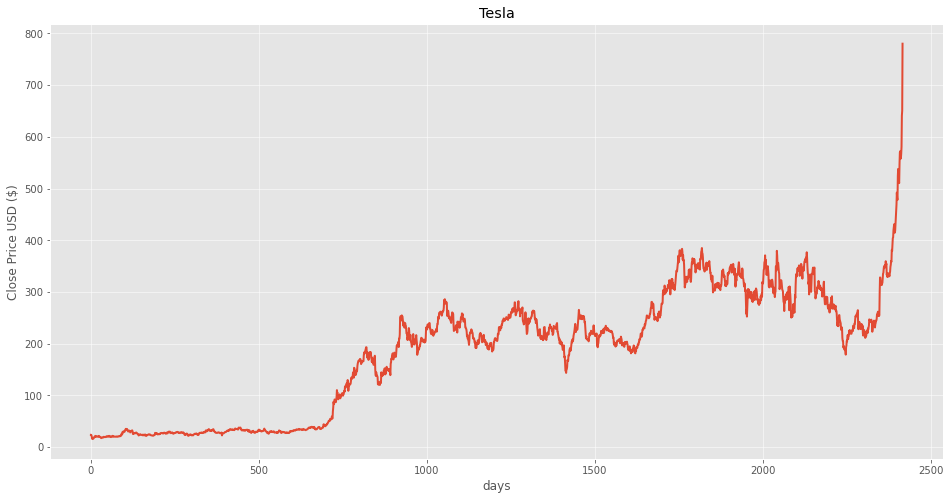

In [15]:
#visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [16]:
#Get the close price
df-df[["Close"]]
df.head(4)

,Open,High,Low,Close,Adj Close,Volume
0,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,19.200001,5139800


In [17]:
#Create a variable to predict 'x' days out into the future
future_days=25
df['Prediction']=df[["Close"]].shift(- future_days)
df.tail(4)

,Open,High,Low,Close,Adj Close,Volume,Prediction
2412,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,NaN
2413,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,NaN
2414,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,NaN
2415,673.690002,786.140015,673.520020,780.000000,780.000000,47065000,NaN


In [18]:
#Create the feature date set (X) and convert it to a numpy array and remove the Last 'x' rous/desy
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[1.90000000e+01 2.50000000e+01 1.75400010e+01 2.38899990e+01
  2.38899990e+01 1.87663000e+07]
 [2.57900010e+01 3.04200000e+01 2.32999990e+01 2.38300000e+01
  2.38300000e+01 1.71871000e+07]
 [2.50000000e+01 2.59200000e+01 2.02700000e+01 2.19599990e+01
  2.19599990e+01 8.21880000e+06]
 ...
 [4.11779999e+02 4.22010010e+02 4.10000000e+02 4.19220001e+02
  4.19220001e+02 1.33196000e+07]
 [4.18359985e+02 4.25470001e+02 4.12690002e+02 4.25250000e+02
  4.25250000e+02 8.05470000e+06]
 [4.27910004e+02 4.33480011e+02 4.26350006e+02 4.30940002e+02
  4.30940002e+02 1.06339000e+07]]


In [19]:

#Create the target date set (y) and convert it to a numpy array and get all the target values except the last 's rous/days
y=np.array(df['Prediction'])[:-future_days]
print(y)


[ 21.26      20.450001  19.59     ... 640.809998 650.570007 780.      ]


In [20]:
#split the data into s training and 25% testing
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.25)

In [21]:
#Get the Last 'x' rows of the feature data set
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future


array([[3.60000000e+02, 3.61200012e+02, 3.49570007e+02, 3.52220001e+02,
        3.52220001e+02, 6.72510000e+06],
       [3.54510010e+02, 3.60839996e+02, 3.54000000e+02, 3.54829987e+02,
        3.54829987e+02, 6.11000000e+06],
       [3.40160004e+02, 3.41000000e+02, 3.30000000e+02, 3.33040009e+02,
        3.33040009e+02, 1.68706000e+07],
       [3.44320007e+02, 3.44570007e+02, 3.34459991e+02, 3.36339996e+02,
        3.36339996e+02, 1.23395000e+07],
       [3.35269989e+02, 3.35500000e+02, 3.27100006e+02, 3.28920013e+02,
        3.28920013e+02, 7.94740000e+06],
       [3.31119995e+02, 3.33929993e+02, 3.28570007e+02, 3.31290009e+02,
        3.31290009e+02, 5.55560000e+06],
       [3.31109985e+02, 3.31260010e+02, 3.27500000e+02, 3.29940002e+02,
        3.29940002e+02, 2.46560000e+06],
       [3.29399994e+02, 3.36380005e+02, 3.28690002e+02, 3.34869995e+02,
        3.34869995e+02, 6.07450000e+06],
       [3.32619995e+02, 3.37910004e+02, 3.32190002e+02, 3.36200012e+02,
        3.36200012e+02, 

In [22]:
df = df.drop(columns=['Date'])

KeyError: "['Date'] not found in axis"

In [23]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Prediction
0,19.000000,25.00,17.540001,23.889999,23.889999,18766300,21.260000
1,25.790001,30.42,23.299999,23.830000,23.830000,17187100,20.450001
2,25.000000,25.92,20.270000,21.959999,21.959999,8218800,19.590000
3,23.000000,23.10,18.709999,19.200001,19.200001,5139800,19.600000
4,20.000000,20.00,15.830000,16.110001,16.110001,6866900,19.030001


In [24]:
#Create the models
#Create the decision tree regressor model
lr = LinearRegression().fit(x_train, y_train)


In [25]:
#show the model Linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[353.60531575 361.2245448  347.77423118 346.05800389 334.07833202
 335.74756221 330.46167656 338.50259355 342.05859474 337.83783759
 330.69143627 344.94123649 347.1238196  353.50144106 359.79051591
 364.3703703  360.79033452 391.50089479 385.53738539 402.31958088
 421.33766047 415.39840527 428.62783325 424.43639539 440.15310093]


<ipython-input-26-b97150d3b6af>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']= predictions


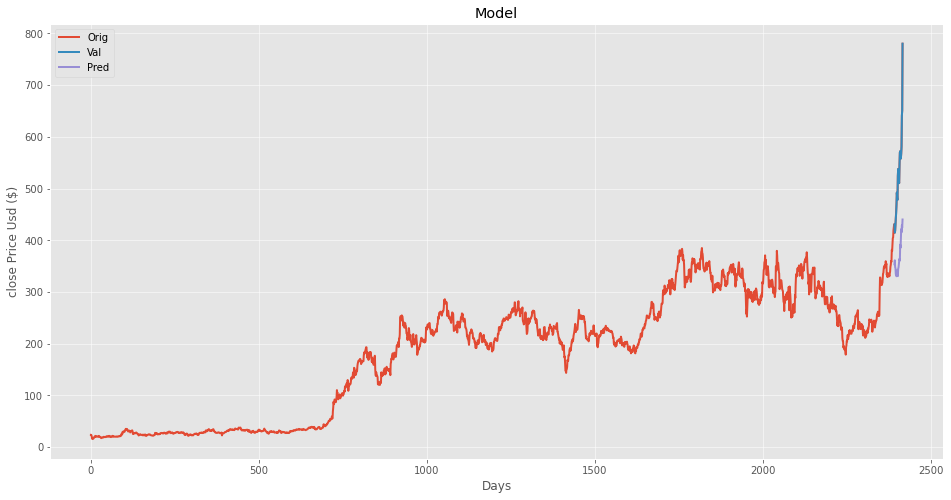

In [26]:
#visualize the date
predictions = lr_prediction
valid=df[X.shape[0]:]
valid['Prediction']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('close Price Usd ($)')
plt.plot(df["Close"])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()